___
<a href='http://www.kgptalkie.com'><img src='../kgptalkie_strips.png'/></a>
___

<center><em>Copyright by KGPTalkie</em></center>
<center><em>For free ML tutorials, visit us at <a href='http://www.kgptalkie.com'>www.kgptalkie.com</a> and <a href='http://www.youtube.com/kgptalkie'>www.youtube.com/kgptalkie</a> </em></center>

# Poetry Generation Using Tensorflow, Keras and LSTM
ref: https://colah.github.io/posts/2015-08-Understanding-LSTMs/


## What is RNN

Recurrent Neural Networks are the first of its kind State of the Art algorithms that can Memorize/remember previous inputs in memory, When a huge set of Sequential data is given to it. Recurrent Neural Networks are the first of its kind State of the Art algorithms that can Memorize/remember previous inputs in memory, When a huge set of Sequential data is given to it.

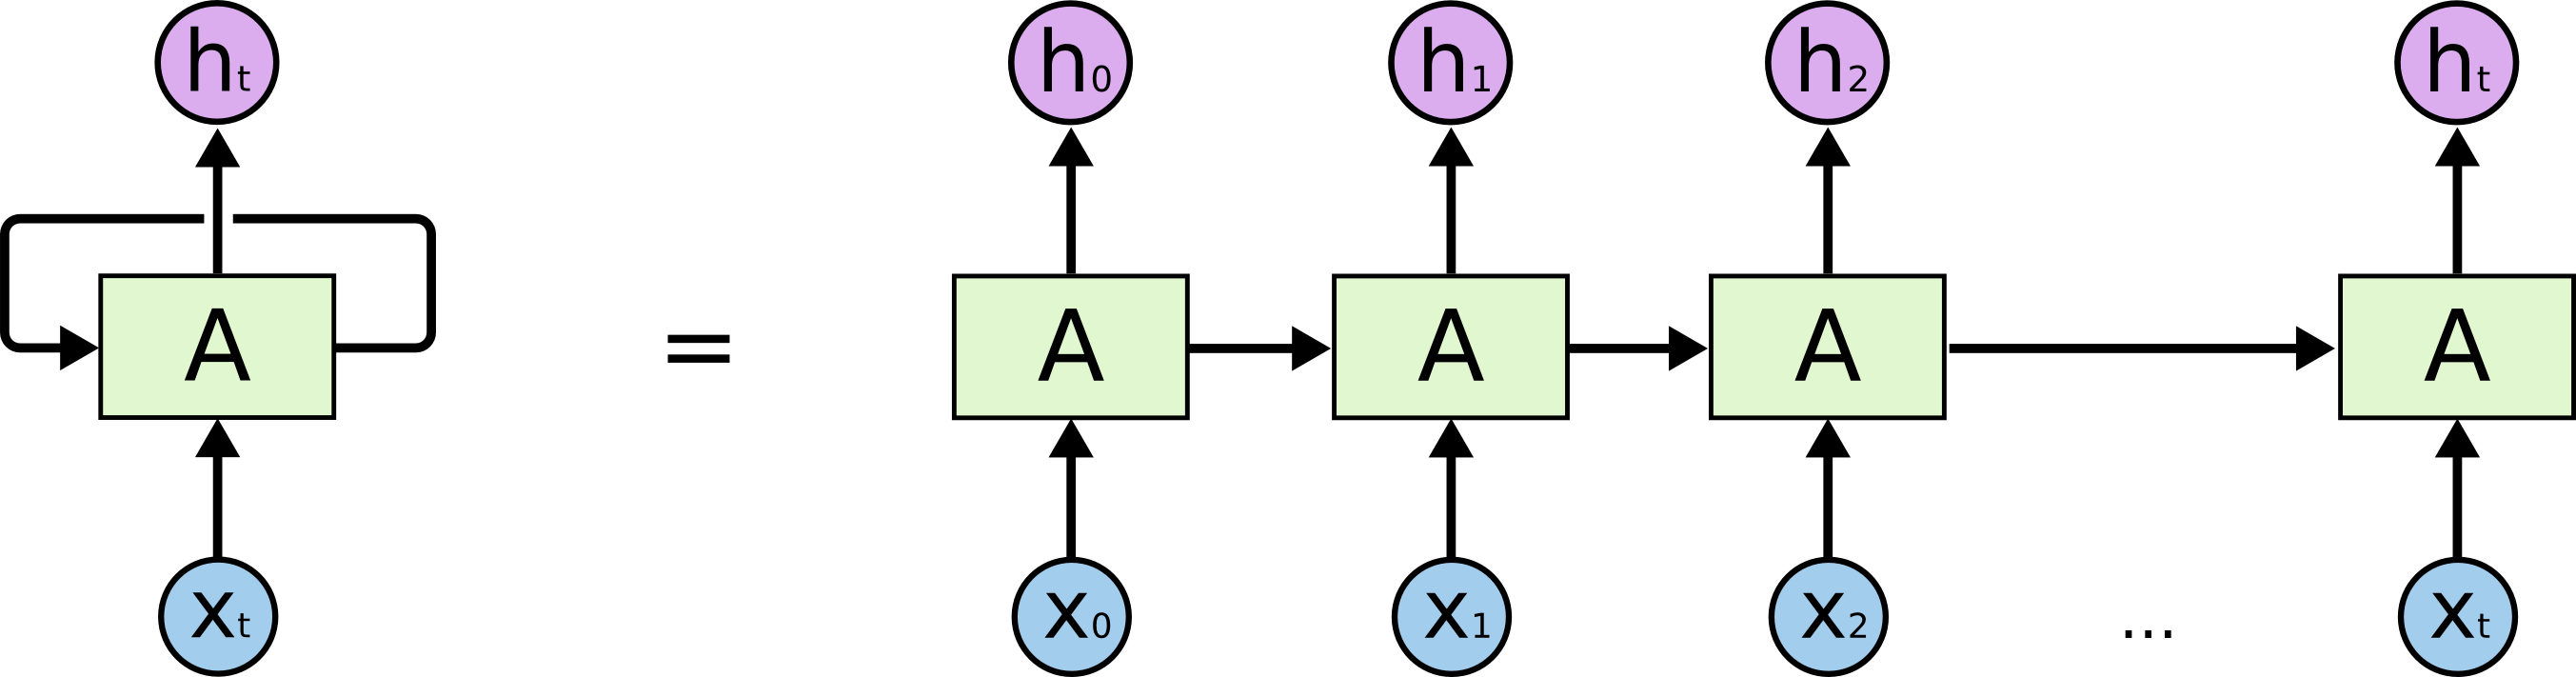

These loops make recurrent neural networks seem kind of mysterious. However, if you think a bit more, it turns out that they aren’t all that different than a normal neural network. A recurrent neural network can be thought of as multiple copies of the same network, each passing a message to a successor.

## Different types of RNN’s 

Different types of Recurrent Neural Networks. 

- Image Classification
- Sequence output (e.g. image captioning takes an image and outputs a sentence of words). 
- Sequence input (e.g. sentiment analysis where a given sentence is classified as expressing positive or negative sentiment). 
- Sequence input and sequence output (e.g. Machine Translation: an RNN reads a sentence in English and then outputs a sentence in French). 
- Synced sequence input and output (e.g. video classification where we wish to label each frame of the video)

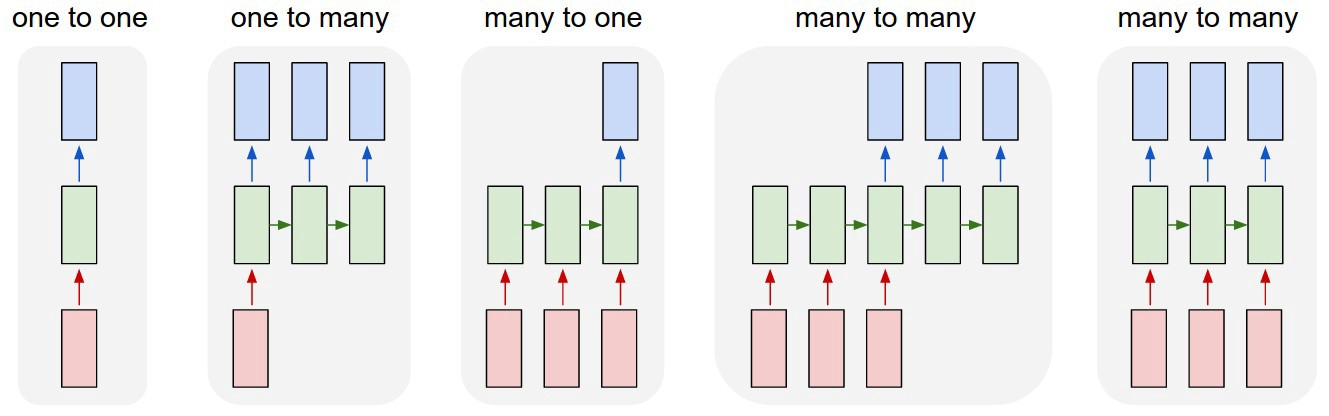

## The Problem of RNN's or Long-Term Dependencies 

- Vanishing Gradient
- Exploding Gradient

### Vanishing Gradient
If the partial derivation of Error is less than 1, then when it get multiplied with the Learning rate which is also very less. then Multiplying learning rate with partial derivation of Error wont be a big change when compared with previous iteration.

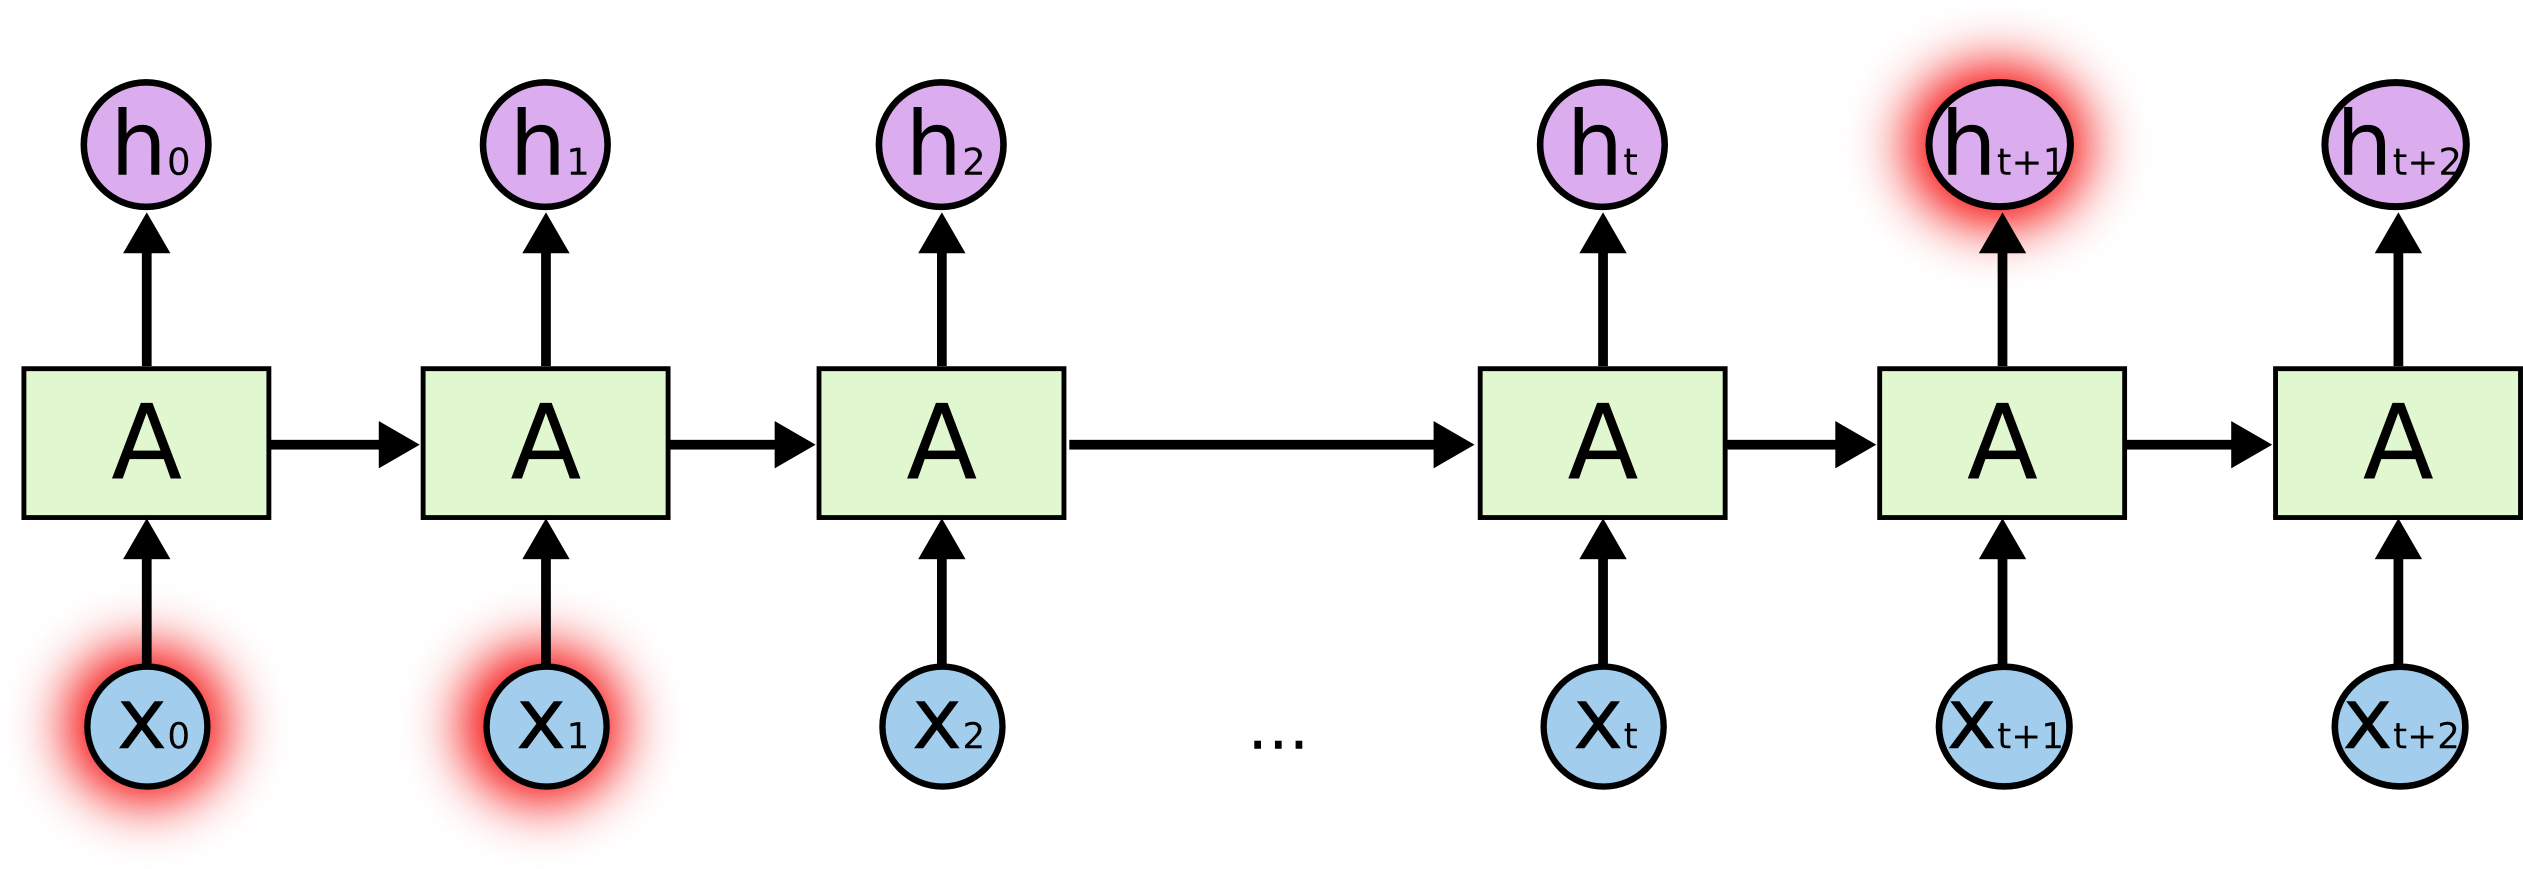

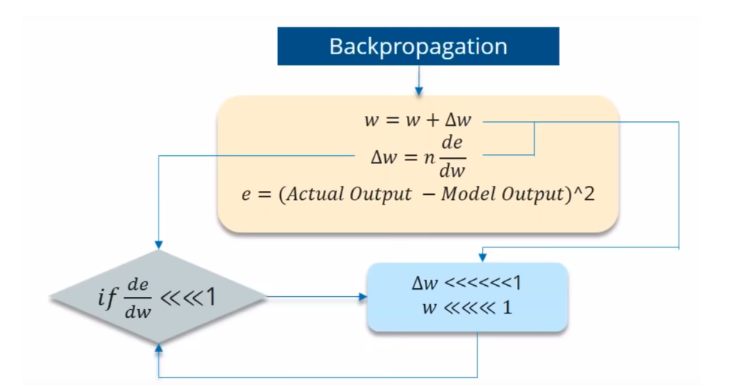

### Exploding Gradient

We speak of Exploding Gradients when the algorithm assigns a stupidly high importance to the weights, without much reason. But fortunately, this problem can be easily solved if you truncate or squash the gradients

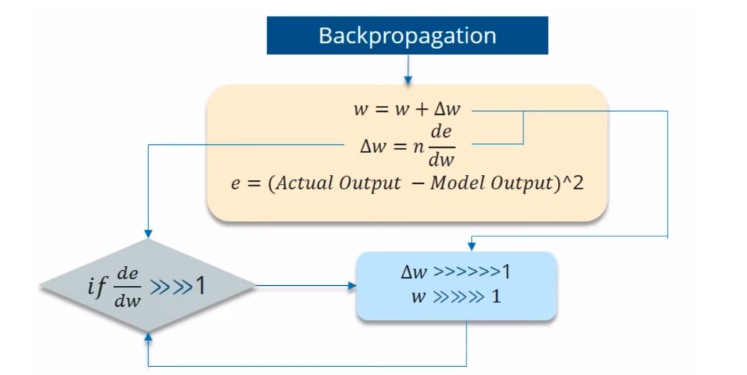

##  Long Short Term Memory (LSTM) Networks

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

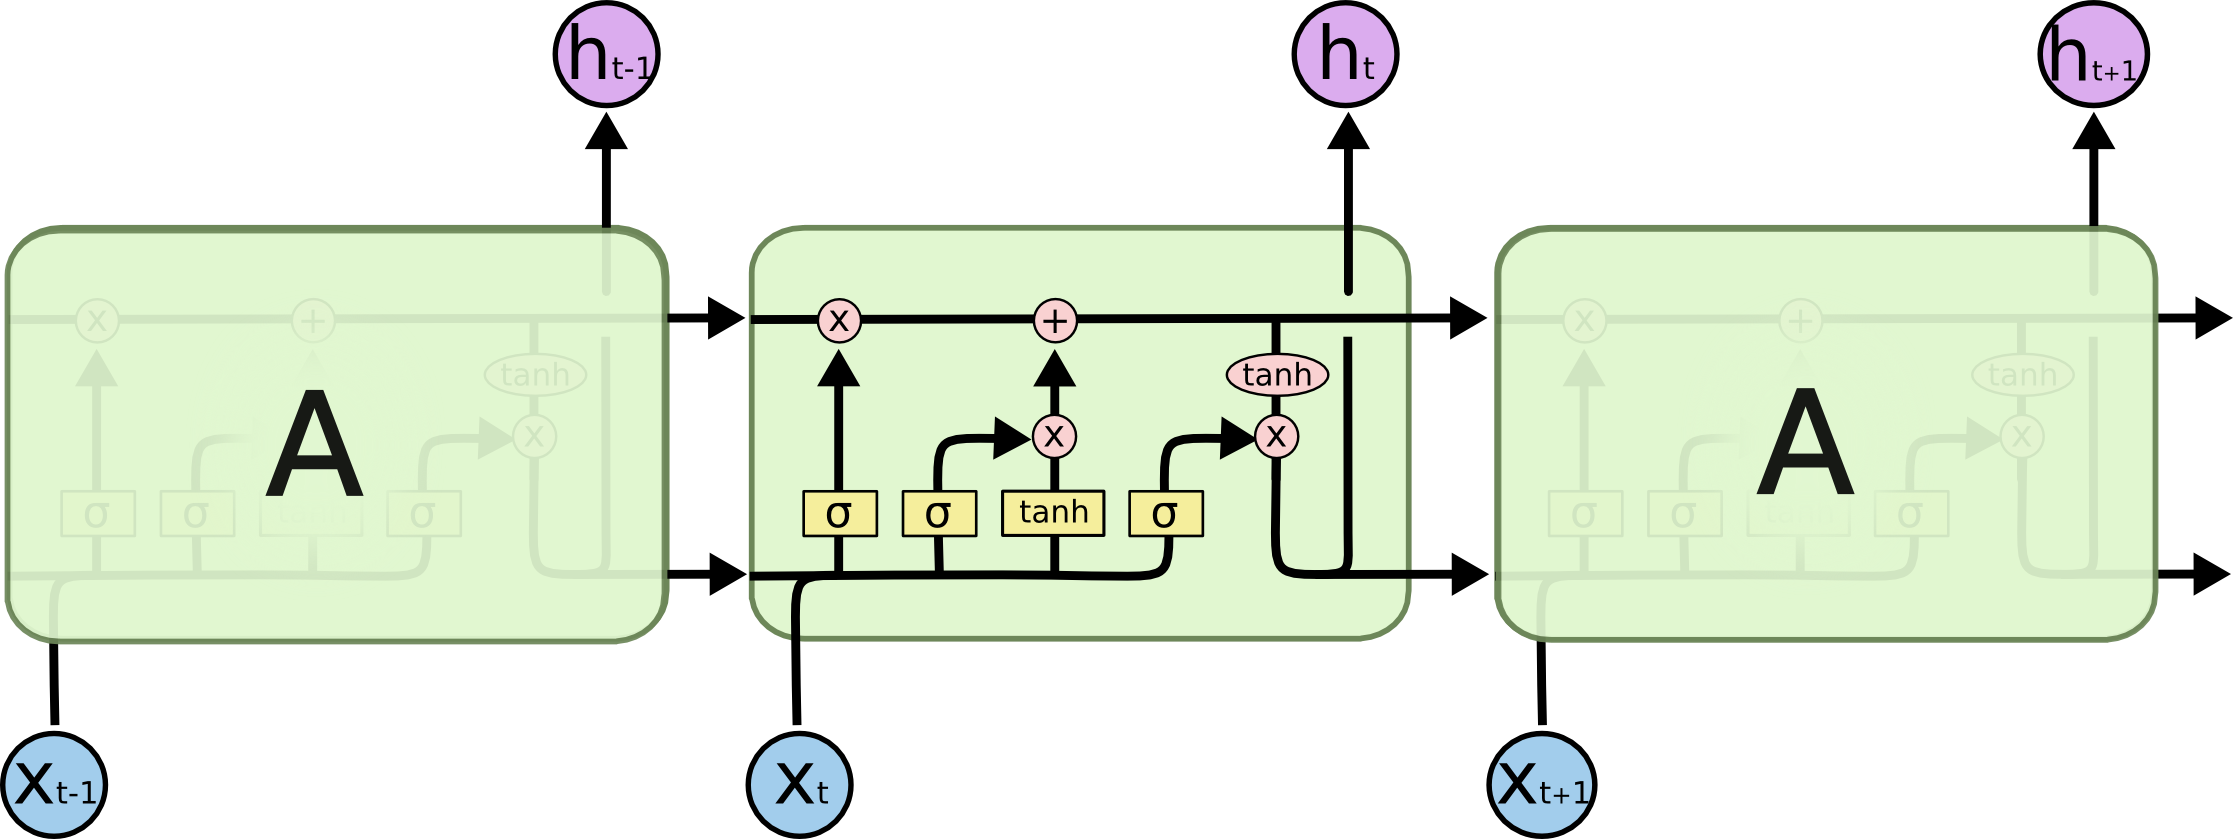

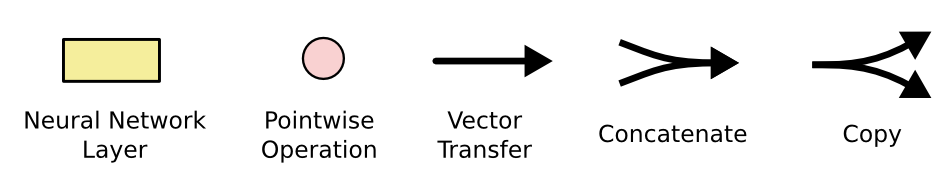

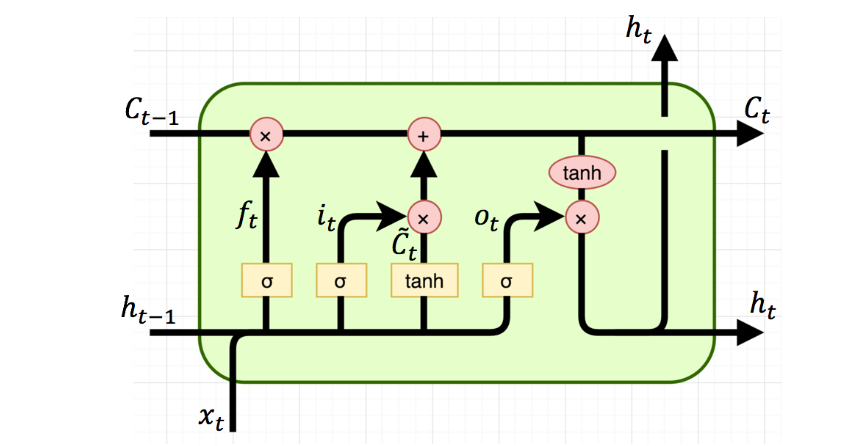

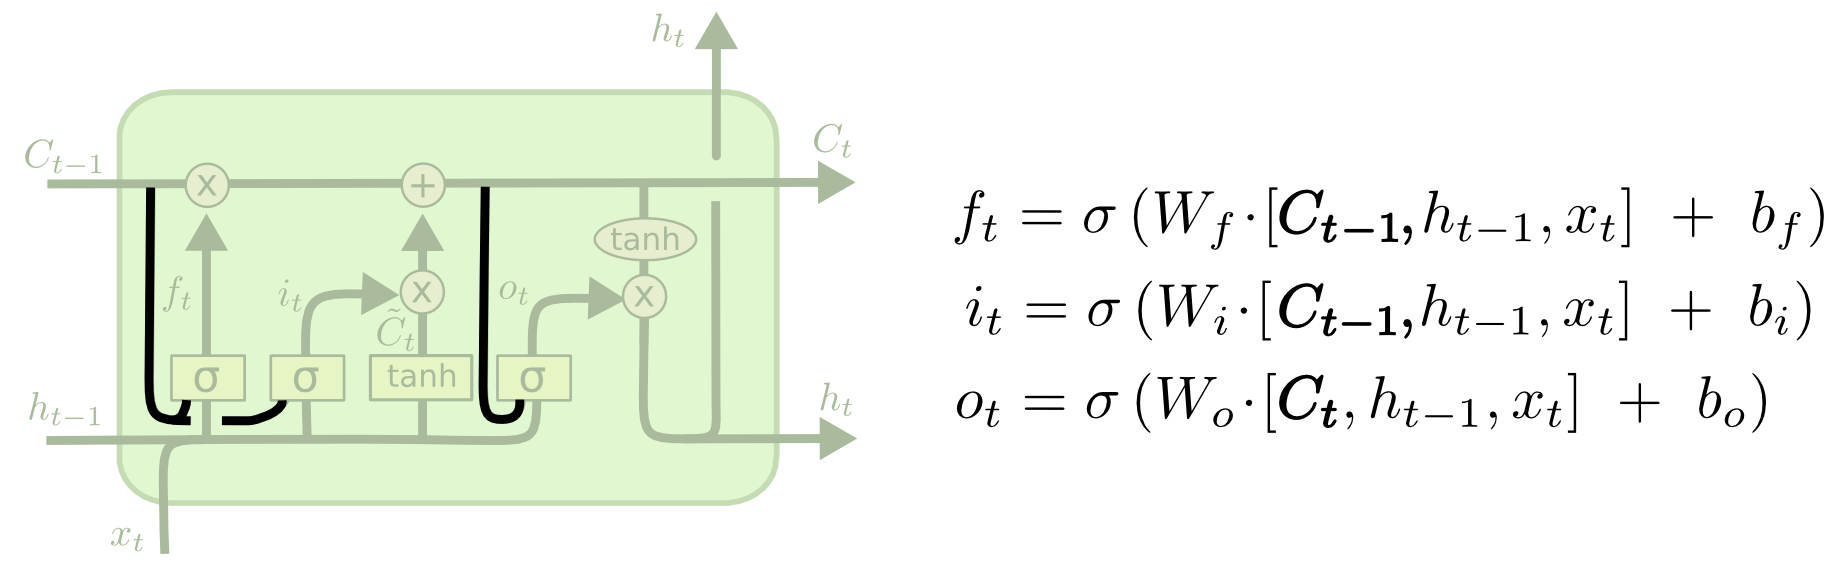

## Sequence Generation Scheme 

![alt text](https://miro.medium.com/max/3444/1*XvUt5wDQA8D3C0wAuxAvbA.png)

In [ ]:
import tensorflow as tf
import string
import requests
import pandas as pd

In [ ]:
response = requests.get('https://raw.githubusercontent.com/laxmimerit/poetry-data/master/adele.txt')

In [ ]:
response

<Response [200]>

In [ ]:
response.text

In [ ]:
data = response.text.splitlines()

In [ ]:
len(data)

2400

In [ ]:
len(" ".join(data))

91330

## Build LSTM Model and Prepare X and y

In [ ]:
# tokenization

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
token = Tokenizer()
token.fit_on_texts(data)

In [ ]:
# token.word_counts

In [ ]:
help(token)

Help on Tokenizer in module keras_preprocessing.text object:

class Tokenizer(builtins.object)
 |  Text tokenization utility class.
 |  
 |  This class allows to vectorize a text corpus, by turning each
 |  text into either a sequence of integers (each integer being the index
 |  of a token in a dictionary) or into a vector where the coefficient
 |  for each token could be binary, based on word count, based on tf-idf...
 |  
 |  # Arguments
 |      num_words: the maximum number of words to keep, based
 |          on word frequency. Only the most common `num_words-1` words will
 |          be kept.
 |      filters: a string where each element is a character that will be
 |          filtered from the texts. The default is all punctuation, plus
 |          tabs and line breaks, minus the `'` character.
 |      lower: boolean. Whether to convert the texts to lowercase.
 |      split: str. Separator for word splitting.
 |      char_level: if True, every character will be treated as a token.

In [ ]:
token.word_index

{'i': 1,
 'you': 2,
 'the': 3,
 'me': 4,
 'to': 5,
 'it': 6,
 'and': 7,
 'my': 8,
 'your': 9,
 'that': 10,
 'love': 11,
 'of': 12,
 'in': 13,
 'all': 14,
 'we': 15,
 'a': 16,
 "i'm": 17,
 'when': 18,
 'but': 19,
 'be': 20,
 'for': 21,
 'so': 22,
 "don't": 23,
 'never': 24,
 "you're": 25,
 'let': 26,
 'if': 27,
 'is': 28,
 'know': 29,
 'up': 30,
 'go': 31,
 'down': 32,
 'will': 33,
 'on': 34,
 'just': 35,
 'do': 36,
 "ain't": 37,
 'heart': 38,
 'like': 39,
 'with': 40,
 'baby': 41,
 "it's": 42,
 'want': 43,
 'this': 44,
 "i've": 45,
 'say': 46,
 'no': 47,
 'as': 48,
 'had': 49,
 'make': 50,
 'can': 51,
 'out': 52,
 'ooh': 53,
 'was': 54,
 'one': 55,
 "can't": 56,
 'time': 57,
 'what': 58,
 'are': 59,
 'feel': 60,
 'see': 61,
 "i'll": 62,
 'fall': 63,
 'there': 64,
 'were': 65,
 'gonna': 66,
 'more': 67,
 "won't": 68,
 'oh': 69,
 'back': 70,
 'face': 71,
 'have': 72,
 'yeah': 73,
 'at': 74,
 "'cause": 75,
 'only': 76,
 'been': 77,
 'stand': 78,
 'ready': 79,
 'way': 80,
 'take': 81,
 'ha

In [ ]:
encoded_text = token.texts_to_sequences(data)

In [ ]:
encoded_text

[[254, 21, 219, 725],
 [117, 8, 80, 153, 3, 133],
 [14, 10, 726, 727],
 [41, 56, 2, 603, 3, 728, 1, 68, 517, 2, 40, 3, 518, 41],
 [1, 23, 107, 189, 300, 9, 57],
 [286, 35, 46, 10, 230],
 [2, 83, 134, 4, 519, 8, 120],
 [1, 37, 520, 102, 19, 27, 25, 254, 21, 328, 11],
 [27, 209, 11, 13, 9, 124],
 [42, 67, 210, 125],
 [49, 219, 446, 11],
 [22, 328, 11, 28, 14, 10, 45, 220, 34, 8, 120, 53, 53],
 [53, 53, 254, 21, 219, 729],
 [117, 8, 80, 153, 3, 287],
 [8, 447, 220, 521, 730],
 [7, 329, 14, 522, 731],
 [1, 35, 189, 72, 219, 523, 1, 68, 517, 2, 40, 3, 518, 41],
 [1, 23, 107, 189, 300, 9, 57],
 [286, 35, 46, 10, 230],
 [2, 83, 134, 4, 519, 8, 120],
 [1, 37, 520, 102, 19, 27, 25, 254, 21, 328, 11],
 [27, 209, 11, 13, 9, 124],
 [42, 67, 210, 125],
 [45, 49, 219, 446, 11],
 [22, 328, 11, 28, 14, 10, 45, 220, 34, 8, 120, 53, 53],
 [41, 41],
 [53, 53],
 [41, 41],
 [53, 53],
 [41, 41],
 [53, 13, 3, 732, 12, 448],
 [1, 117, 8, 80, 153, 3, 133],
 [390, 733, 391, 34, 198, 4],
 [7, 1, 61, 108, 13, 288

In [ ]:
x = ['i love you']

In [ ]:
token.texts_to_sequences(x)

[[1, 11, 2]]

In [ ]:
vocab_size = len(token.word_counts) + 1

##  Prepare Training Data

In [ ]:
datalist = []
for d in encoded_text:
  if len(d)>1:
    for i in range(2, len(d)):
      datalist.append(d[:i])
      print(d[:i])

Streaming output truncated to the last 5000 lines.
[27, 6]
[27, 6, 218]
[27, 6, 218, 77]
[27, 6, 218, 77, 27]
[27, 6, 218, 77, 27, 6]
[27, 6, 218, 77, 27, 6, 218]
[27, 6, 218, 77, 27, 6, 218, 77]
[27, 6, 218, 77, 27, 6, 218, 77, 21]
[27, 6]
[27, 6, 218]
[27, 6, 218, 77]
[27, 6, 218, 77, 27]
[27, 6, 218, 77, 27, 6]
[27, 6, 218, 77, 27, 6, 218]
[27, 6, 218, 77, 27, 6, 218, 77]
[27, 6, 218, 77, 27, 6, 218, 77, 21]
[27, 6, 218, 77, 27, 6, 218, 77, 21, 11]
[27, 6]
[27, 6, 218]
[27, 6, 218, 77]
[27, 6, 218, 77, 27]
[27, 6, 218, 77, 27, 6]
[27, 6, 218, 77, 27, 6, 218]
[27, 6, 218, 77, 27, 6, 218, 77]
[27, 6, 218, 77, 27, 6, 218, 77, 21]
[27, 6, 218, 77, 27, 6, 218, 77, 21, 11]
[27, 6, 218, 77, 27, 6, 218, 77, 21, 11, 683]
[27, 6, 218, 77, 27, 6, 218, 77, 21, 11, 683, 129]
[27, 6, 218, 77, 27, 6, 218, 77, 21, 11, 683, 129, 8]
[27, 6, 218, 77, 27, 6, 218, 77, 21, 11, 683, 129, 8, 158]
[27, 6, 218, 77, 27, 6, 218, 77, 21, 11, 683, 129, 8, 158, 243]
[27, 6, 218, 77, 27, 6, 218, 77, 21, 11, 683, 1

## Padding

In [ ]:
max_length = 20
sequences = pad_sequences(datalist, maxlen=max_length, padding='pre')
sequences

array([[  0,   0,   0, ...,   0, 254,  21],
       [  0,   0,   0, ..., 254,  21, 219],
       [  0,   0,   0, ...,   0, 117,   8],
       ...,
       [  0,   0,   0, ...,  17, 198,  17],
       [  0,   0,   0, ..., 198,  17, 198],
       [  0,   0,   0, ...,  17, 198,   6]], dtype=int32)

In [ ]:
X = sequences[:, :-1]

In [ ]:
y = sequences[:, -1]

In [ ]:
vocab_size

1396

In [ ]:
y = to_categorical(y, num_classes=vocab_size)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
seq_length = X.shape[1]

In [ ]:
seq_length

19

## LSTM Model Training

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 19, 50)            69800     
_________________________________________________________________
lstm (LSTM)                  (None, 19, 100)           60400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 1396)              140996    
Total params: 361,696
Trainable params: 361,696
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, batch_size=32, epochs=100)

Epoch 1/50
445/445 [==============================] - 3s 6ms/step - loss: 1.0237 - accuracy: 0.7342
Epoch 2/50
445/445 [==============================] - 3s 6ms/step - loss: 0.9956 - accuracy: 0.7414
Epoch 3/50
445/445 [==============================] - 3s 6ms/step - loss: 0.9648 - accuracy: 0.7460
Epoch 4/50
445/445 [==============================] - 3s 6ms/step - loss: 0.9341 - accuracy: 0.7557
Epoch 5/50
445/445 [==============================] - 3s 7ms/step - loss: 0.9006 - accuracy: 0.7623
Epoch 6/50
445/445 [==============================] - 3s 6ms/step - loss: 0.8720 - accuracy: 0.7671
Epoch 7/50
445/445 [==============================] - 3s 6ms/step - loss: 0.8490 - accuracy: 0.7773
Epoch 8/50
445/445 [==============================] - 3s 6ms/step - loss: 0.8284 - accuracy: 0.7790
Epoch 9/50
445/445 [==============================] - 3s 6ms/step - loss: 0.8073 - accuracy: 0.7872
Epoch 10/50
445/445 [==============================] - 3s 6ms/step - loss: 0.7844 - accuracy: 0.7905

## Poetry Generation

In [ ]:
poetry_length = 10

def generate_poetry(seed_text, n_lines):

  for i in range(n_lines):
    text = []
    for _ in range(poetry_length):
      encoded = token.texts_to_sequences([seed_text])
      encoded = pad_sequences(encoded, maxlen=seq_length, padding='pre')

      y_pred = np.argmax(model.predict(encoded), axis=-1)

      predicted_word = ""
      for word, index in token.word_index.items():
        if index == y_pred:
          predicted_word = word
          break

      seed_text = seed_text + ' ' + predicted_word
      text.append(predicted_word)

    seed_text = text[-1]
    text = ' '.join(text)
    print(text)




In [ ]:
seed_text = 'i love you'
generate_poetry(seed_text, 5)

is no and i want to do is wash your
name i set fire to the beat tears are gonna
understand last night she let the sky fall when it
was just like a song i was so scared to
make us grow from the arms of your love to


# Other Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |
